## 변수설명

* ID : 집을 구분하는 번호
* date : 집을 구매한 날짜
* price : 집의 가격(Target variable)
* bedrooms : 침실의 수
* bathrooms : 화장실의 수
    - full bath : 화장실, 세면대, 샤워실, 욕조
    - 3/4 bath : 화장실, 세면대, 샤워실
    - half bath : 화장실, 세면대
* sqft_living : 주거 공간의 평방 피트(면적)
* sqft_lot : 부지의 평방 피트(면적)
* floors : 집의 층 수
* waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
* view : Has been viewed
* condition : 집의 전반적인 상태
* grade : King County grading 시스템 기준으로 매긴 집의 등급
* sqft_above : 지하실을 제외한 평방 피트(면적)
* sqft_basement : 지하실의 평방 피트(면적)
* yr_built : 지어진 년도
* yr_renovated : 집을 재건축한 년도
* zipcode : 우편번호
* lat : 위도
* long : 경도
* sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
* sqft_lot15 : 2015년 기준 주차 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있

In [1]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
print("train.csv. Shape: ",df_train.shape)
print("test.csv. Shape: ",df_test.shape)

train.csv. Shape:  (15035, 21)
test.csv. Shape:  (6468, 20)


In [3]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
# 결측치 확인
#(df_train.isnull()).sum(axis=0) #걸럼별 결측치 계수

In [5]:
# df_train["bathrooms"].drop_duplicates()

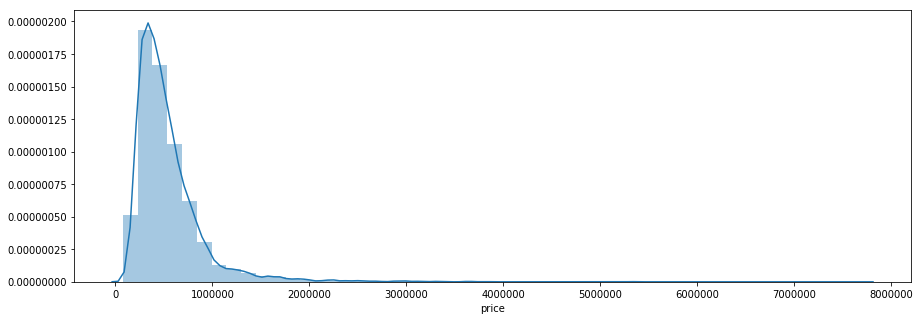

In [6]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df_train['price'])

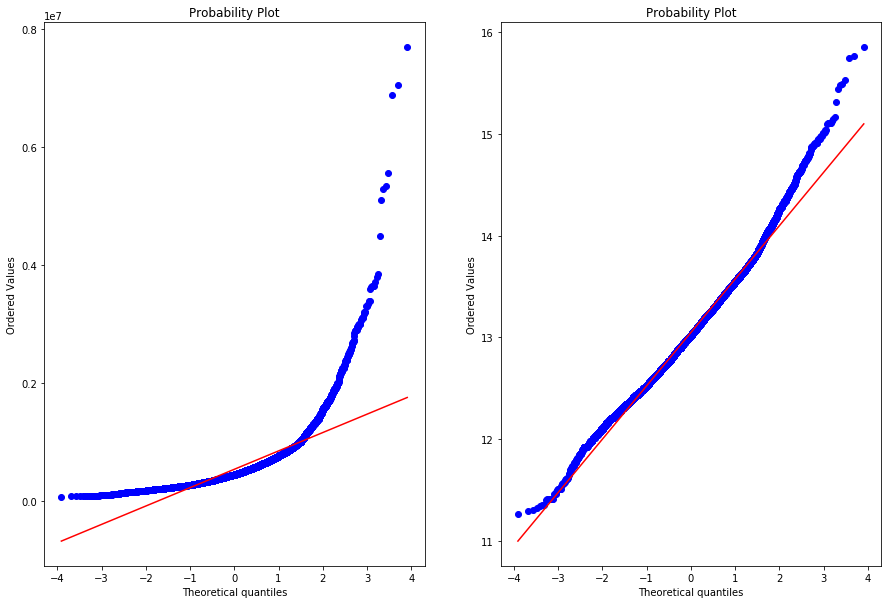

In [7]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['price'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['price']), plot=plt)

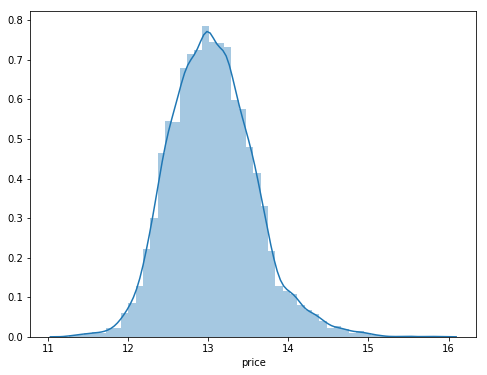

In [8]:
df_train['price'] = np.log1p(df_train['price'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

## 피어슨 상관계수

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


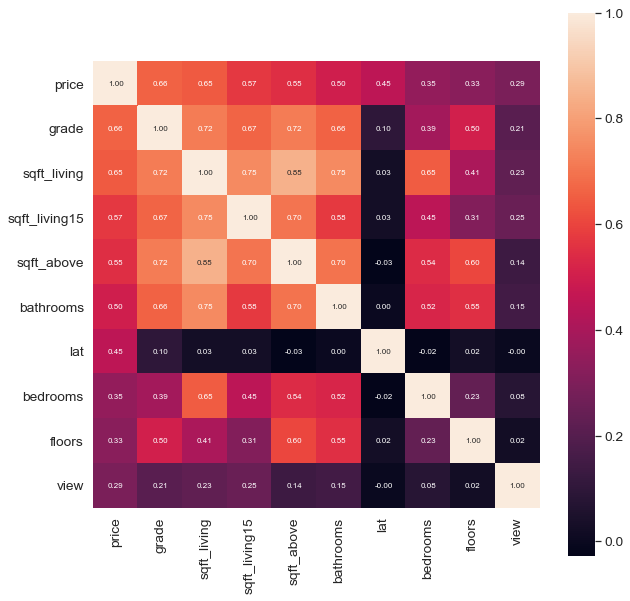

In [9]:
import scipy as sp

cor_abs = abs(df_train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='price').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


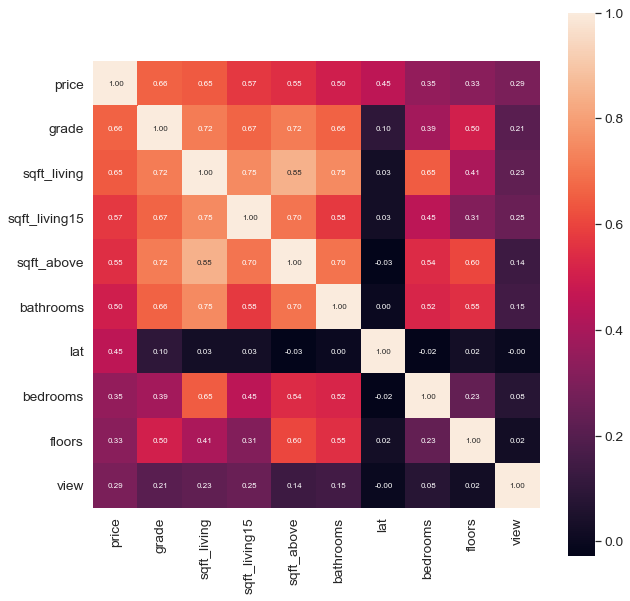

In [10]:
cor_cols = df_train.corr(method='spearman').nlargest(n=10, columns='price').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

## price - grade간 boxplot

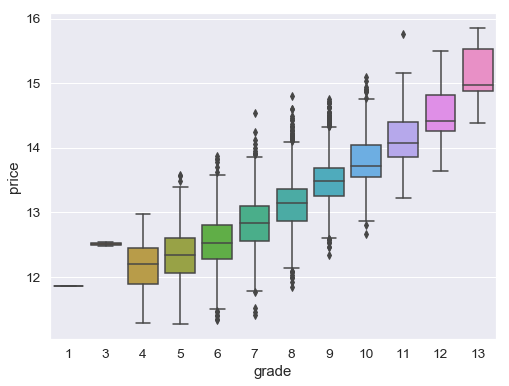

In [11]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

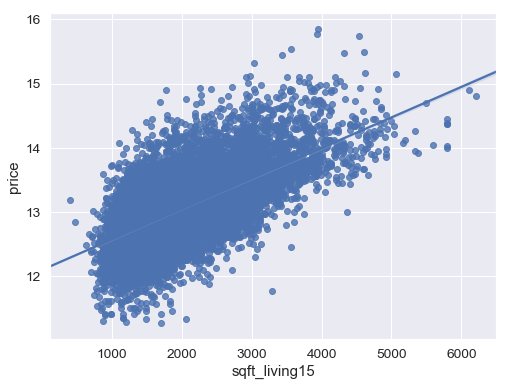

In [12]:
data = pd.concat([df_train['price'], df_train['sqft_living15']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living15', y="price", data=data)

In [13]:
df_train['price'] = np.log1p(df_train['price'])
price_grade = np.where(df_train['price'] <= 12, 'E', 
    np.where((12 < df_train['price']) & (df_train['price'] <= 13),'D',
    np.where((13 < df_train['price']) & (df_train['price'] <= 14),'C',
    np.where((14 < df_train['price']) & (df_train['price'] <= 15),'B',
    'A'))))
df_train['price_grade'] = price_grade

ValueError: Could not interpret input 'year'

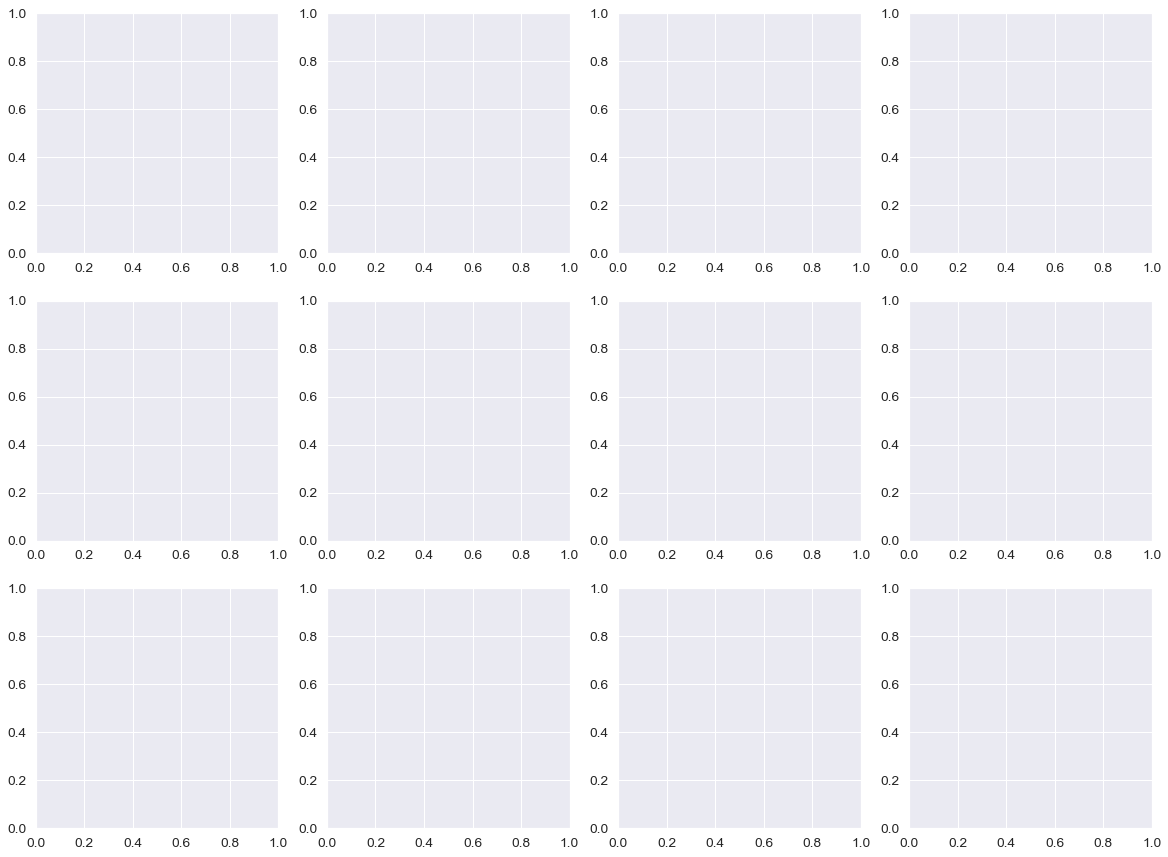

In [14]:
count_info = ['year', 'month', 'day', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for r in range(3):
    for c in range(4):
        index = 4 * r + c
        if index == len(count_info):
            break
        sns.countplot(data=data, x=count_info[index], ax=axes[r, c])
        axes[r, c].set_xlabel('')
        axes[r, c].set_title(count_info[index], fontsize=20)

In [ ]:
type(df_train)

In [ ]:
df_train.iloc[np.where((12 < df_train['price']) & (df_train['price'] <= 13))]

In [ ]:
data = pd.concat([df_train['lat'], df_train['long']], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.scatterplot(x="long"
                     ,y="lat"
                     ,data=df_train
                     ,hue="price_grade"
                     ,style="price_grade"
                     ,alpha=0.7)

In [ ]:
df_train['date'] = df_train['date'].apply(lambda x: x[0:6])
df_train['date'].unique()

In [ ]:
df_train = pd.read_csv('train.csv')
df_train['count'] = 1

In [ ]:
zipcode_count = df_train[['zipcode', 'count']].groupby('zipcode').sum()
zipcode_count.sort_values(["count"], ascending=[False]).head(5)